In [1]:
import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_sets = 20
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [4]:
my_start = 400.0 #9.6e3 #400.0
my_stop =  1.6e4#1.6e4 #1.6e4
my_step = 800.0

my_variables = list(np.arange(my_start, my_stop, my_step))
my_variables.insert(0,0.0)
print(my_variables)
print(len(my_variables))

[0.0, 400.0, 1200.0, 2000.0, 2800.0, 3600.0, 4400.0, 5200.0, 6000.0, 6800.0, 7600.0, 8400.0, 9200.0, 10000.0, 10800.0, 11600.0, 12400.0, 13200.0, 14000.0, 14800.0, 15600.0]
21


### Load the data

In [5]:
path_to_data = './'
study_name = 'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsONvsOFF_ayyScanlong' # title for save figures
study_name_1 = 'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_Nowakefields_ayyScan'
study_name_2 = 'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayyScan'
noise_type = 'PN'

my_df_1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ))
my_df_2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ) )

In [6]:
my_df_2

,ayy_0.0,ayy_400.0,ayy_1200.0,ayy_2000.0,ayy_2800.0,ayy_3600.0,ayy_4400.0,ayy_5200.0,ayy_6000.0,ayy_6800.0,...,ayy_8400.0,ayy_9200.0,ayy_10000.0,ayy_10800.0,ayy_11600.0,ayy_12400.0,ayy_13200.0,ayy_14000.0,ayy_14800.0,ayy_15600.0
m,"[1.2678400662554167e-08, 1.1513261405295432e-0...","[1.3288094842982101e-08, 1.1230092488332154e-0...","[1.0639517492772433e-08, 2.007541060256535e-08...","[1.3555956006397332e-08, 1.3886985288086191e-0...","[1.678389521548951e-08, 1.5288014009135292e-08...","[1.765346083114534e-08, 1.766107204353259e-08,...","[2.1914751286754833e-08, 2.262699175507553e-08...","[1.9291486595037274e-08, 1.678988355151681e-08...","[1.7353065601330872e-08, 1.637700054729589e-08...","[2.6118116260388383e-08, 2.8226640106734254e-0...",...,"[2.9283159508890214e-08, 1.9281895813522458e-0...","[2.7183206936050044e-08, 2.2489086857538966e-0...","[2.5587225989677367e-08, 2.641570386792309e-08...","[2.3407175819815726e-08, 1.9216584415706412e-0...","[2.3555207372506152e-08, 2.110838110128527e-08...","[2.4378315532717407e-08, 2.233810313713555e-08...","[2.4674434962057698e-08, 2.1630782198186208e-0...","[2.436814625529299e-08, 2.2599539138963576e-08...","[2.335678895960847e-08, 2.4254498115819775e-08...","[2.3844433850141317e-08, 2.6725789468389142e-0..."
b,"[2.0003268563004876e-06, 1.9996323850308294e-0...","[1.9990477327195466e-06, 2.0001341953209566e-0...","[1.999779667893096e-06, 1.994193189982029e-06,...","[2.0030906824064676e-06, 1.9975510438506444e-0...","[1.9997260451976073e-06, 1.9992134295911263e-0...","[2.002555655251956e-06, 1.997429302784479e-06,...","[2.0003920000402825e-06, 1.9929022533164003e-0...","[2.0064583319486167e-06, 1.997108078789512e-06...","[2.004507356363004e-06, 2.0010573870896126e-06...","[1.998187497747284e-06, 1.999815911933675e-06,...",...,"[1.9933513019645093e-06, 2.001051680346519e-06...","[1.9987586105687913e-06, 1.998460646825524e-06...","[1.9960296713025993e-06, 1.999683987845799e-06...","[2.001432023607556e-06, 1.999631945869197e-06,...","[2.0031784191226443e-06, 2.001513879546757e-06...","[2.0016949931981017e-06, 2.0044716114883633e-0...","[2.0029749677545103e-06, 2.0004999162498585e-0...","[2.001627536007801e-06, 2.001273094620736e-06,...","[2.001176894131332e-06, 2.00047385668187e-06, ...","[1.9994593978700118e-06, 1.9964476292818247e-0..."
err,"[9.700752044963358e-11, 9.481151187685842e-11,...","[1.0596829232850438e-10, 7.91179742042344e-11,...","[6.269694373524059e-11, 1.931880228654796e-10,...","[1.2371277646791002e-10, 8.87634429683188e-11,...","[4.817769794149752e-11, 9.660524493361727e-11,...","[6.676509155885066e-11, 9.895130130538048e-11,...","[1.3690296230539382e-10, 1.7915661885895766e-1...","[1.3802105362066116e-10, 5.469761430724666e-11...","[1.3526948252473235e-10, 4.1390443145211423e-1...","[1.4671305458635576e-10, 1.702266997292121e-10...",...,"[1.3715261426738513e-10, 9.644994178997368e-11...","[1.5507868409254531e-10, 9.203746396301035e-11...","[1.457230200929326e-10, 1.3058133253411597e-10...","[9.940494600737421e-11, 1.2416160159416686e-10...","[9.121202292944067e-11, 8.382806703911732e-11,...","[9.86879300961076e-11, 1.0569818379727401e-10,...","[9.948807803277244e-11, 9.216403966080928e-11,...","[9.905213389727466e-11, 9.891425703272611e-11,...","[8.266655035372251e-11, 9.089909978551938e-11,...","[7.136773579939002e-11, 5.261832722147944e-11,..."


In [7]:
my_df_keys = list(my_df_2.keys()) # same keys for both data Frames
print(my_df_keys)

['ayy_0.0', 'ayy_400.0', 'ayy_1200.0', 'ayy_2000.0', 'ayy_2800.0', 'ayy_3600.0', 'ayy_4400.0', 'ayy_5200.0', 'ayy_6000.0', 'ayy_6800.0', 'ayy_7600.0', 'ayy_8400.0', 'ayy_9200.0', 'ayy_10000.0', 'ayy_10800.0', 'ayy_11600.0', 'ayy_12400.0', 'ayy_13200.0', 'ayy_14000.0', 'ayy_14800.0', 'ayy_15600.0']


### Compute error bars

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err_1 \\
y_2 = a_2 x \pm err_2 \\
y_3 = a_3 x \pm err_3
\end{equation}

where $a_1, a_2, a_3$ is the growth rates obtained from a linear fit on the simulation data and $err_1, err_2, err_3$ the error of the linear fit. 


Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

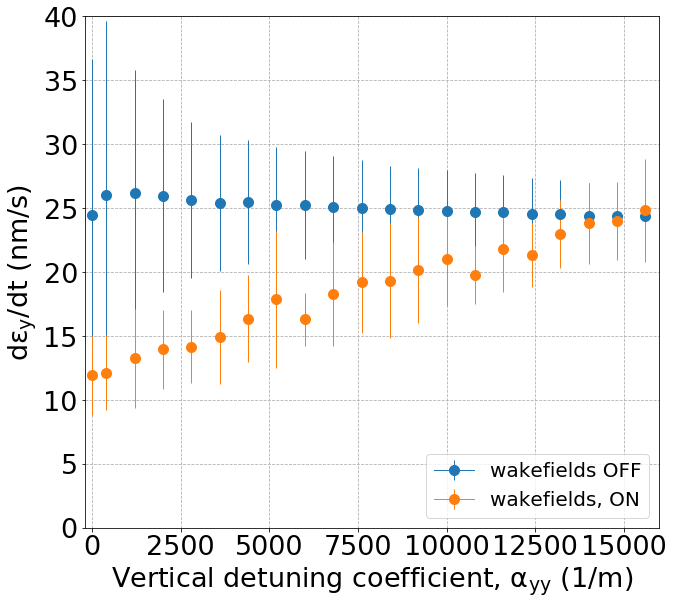

In [8]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    
plt.legend(loc=4)

plt.xlim(-200, 16000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}.png', bbox_inches='tight')

### Compute the theoretically expected rate

In [9]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
sigma_z = 0.155 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [10]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5168486015622045, CDeltaA = 0.24157569921889774
expected growth = 23.813362141833874 nm/s


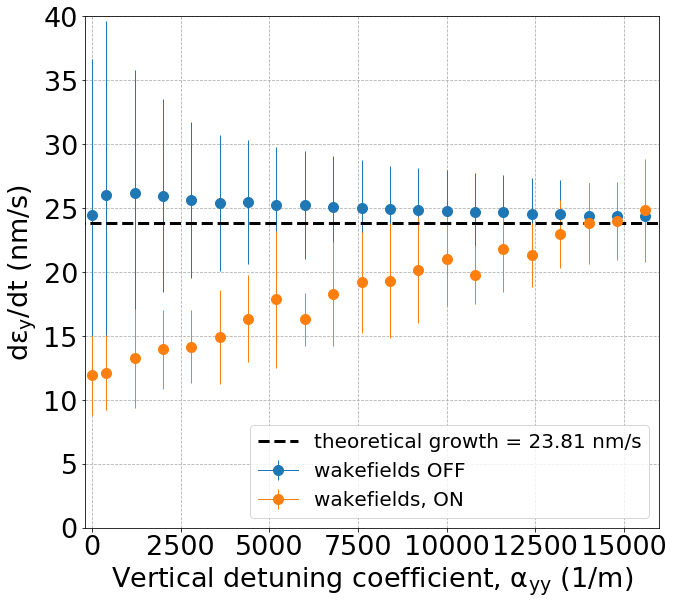

In [11]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    

plt.hlines(expected_growth*1e9, -500, 16000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')

plt.legend(loc=4)

plt.xlim(-200, 16000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}_vs_Theory.png', bbox_inches='tight')

### Compute the rms detuning with amplitude

In [12]:
#Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name_dq ='sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayy400.0_run0/'
bunch = pickle.load(open(path_to_data+study_name_dq+'bunch', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.5

PyHEADTAIL v1.13.5




In [13]:
# Optics at CC2
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)

rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=6.9244903760955545e-09 m
rms(Jy)=6.942239455998446e-09 m


In [14]:
Dqy_rms = []
axy = 0
for ayy in my_variables:
    Dqy_rms.append(amplitude_detuning_y(rms_Jx_init, rms_Jy_init, ayy, axy))

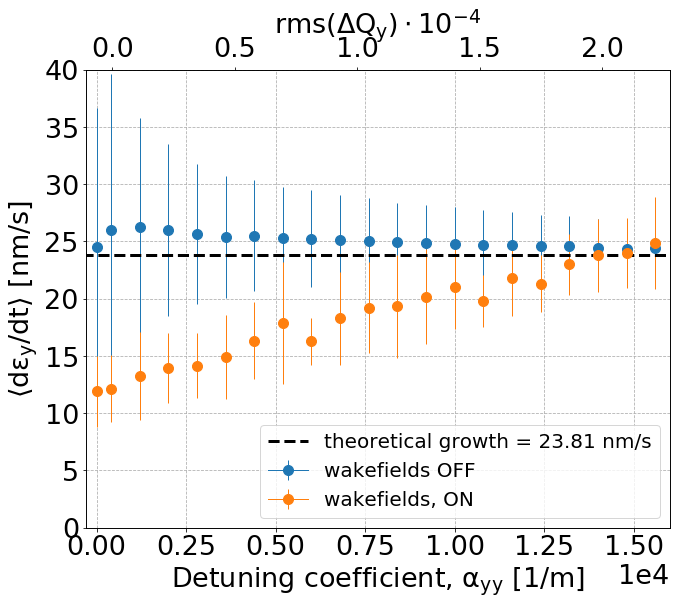

In [17]:
fig, ax = plt.subplots(1,1)

for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    

ax2 = ax.twiny()
ax2.plot(np.array(Dqy_rms)*1e4, np.arange(0,len(my_variables)), linestyle='')


ax.hlines(expected_growth*1e9, -400, 17000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')
ax.legend(loc=4)

ax.set_xlim(-300, 16000)
ax.set_ylim(0, 40)
ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$')

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}_vs_TuneSpread_v2.png', bbox_inches='tight')

In [46]:

# Example print
np.array(my_df_1[my_df_1.keys()[2]]['m'])*1e9

array([49.72376547, 22.32295153, 34.44805967, 21.19864509, 22.69796171,
       36.67377349, 22.58457485, 17.83464725, 16.80125184, 31.29614253,
       23.61493426, 23.52333723, 18.38101408, 28.45021806, 31.80492825,
       10.30702751, 12.87941901, 23.10976157, 35.39247454, 41.28734449])

In [37]:
test = np.linspace(-1e-17, -1e-11, 20)
print(test)
test_2 = test/(-1*2*bunch.p0*1e4) #1/m 1e4

print(test_2)

[-1.00000000e-17 -5.26325263e-13 -1.05264053e-12 -1.57895579e-12
 -2.10527105e-12 -2.63158632e-12 -3.15790158e-12 -3.68421684e-12
 -4.21053211e-12 -4.73684737e-12 -5.26316263e-12 -5.78947789e-12
 -6.31579316e-12 -6.84210842e-12 -7.36842368e-12 -7.89473895e-12
 -8.42105421e-12 -8.94736947e-12 -9.47368474e-12 -1.00000000e-11]
[3.46468180e-06 1.82354956e-01 3.64706448e-01 5.47057939e-01
 7.29409431e-01 9.11760922e-01 1.09411241e+00 1.27646391e+00
 1.45881540e+00 1.64116689e+00 1.82351838e+00 2.00586987e+00
 2.18822136e+00 2.37057285e+00 2.55292435e+00 2.73527584e+00
 2.91762733e+00 3.09997882e+00 3.28233031e+00 3.46468180e+00]


In [35]:
1.274e-13/(2*bunch.p0*1e4)

0.044140046179090175